In [67]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
from matplotlib import cm
from celluloid import Camera
import pickle #store

In [68]:
n = 10 #nb des noeuds
k = 15  #nb des itérations
c = 1/(n+1)

a = 30 #longueur de l'espace
b = 20 #largeur de l'espace

r_det = ( ((a**2+b**2)**(1/2))/5 )*6 #rayon de détection
r_sec = r_det/3  #rayon de sécurité

print(r_det)
print(r_sec)

43.26661530556787
14.422205101855956


In [69]:
def positionToAdjMatrix(x,y,r_det):
    n=len(x)
    matrix = [[0 for i in range(n)] for j in range(n)]

    for i in range(n):
        for j in range(n):
            distance_ij = ((x[i]-x[j])**2 + (y[i]-y[j])**2)**(1/2)

            if distance_ij <= r_det :
                matrix[i][j] = 1

    # pas de boucle sur le même noeuds
    for i in range(n):
        matrix[i][i] = 0

    return matrix


def Laplacienne(M):
    #matrice degré
    D = np.identity(len(M[0]))
    degre = np.sum(M,axis=1)
    for i in range(n):
        D[i][i]=degre[i]
    
    #print("\n matrice degre\n",D)
    
    L = D - M
    
    return L

def adjToCom(M):
    #matrice de communication
    C = np.copy(np.array(M))
    facteur=np.sum(M,axis=1)
    C = C.astype('float')
    for i in range(n):
        if facteur[i]==0:
            facteur[i] = 1
        C[i]=C[i]/facteur[i]
    return C


def pMatrix(M):
    I = np.identity(len(M[0]))
    P = I - c*Laplacienne(M)
    
    return P

def randStocastic(n):
    matrix = np.random.rand(n,n)

    m = matrix/matrix.sum(axis=1)[:,None]
    
    return m


def matriceCom(H,W):
    
    I = np.identity(n)
    J = np.ones(n)
    Q = H + I
    Q_ = J - Q
    
    A = np.multiply(Q,W) + np.multiply(np.dot((np.multiply(W,Q_)),J),I)

    return A


def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, with_labels=True)
    plt.show()
    
    

def mouvement1(x,y,A):      
    for i in range(n):
        a=0
        b=0
        for j in range(n):
            a += (x[j])*A[i][j]
            b += (y[j])*A[i][j]
        x[i]=a
        y[i]=b
    return x,y


def mouvement(x,y,A):      
    
    X = np.copy(np.array(x))
    Y = np.copy(np.array(y))
    
     
    X = np.dot(A,X)
    Y = np.dot(A,Y)
    
    x = X
    y = Y
    return x,y

In [70]:
#positionner les robots aléatoirement 
rnd = np.random
rnd.seed(0)

#x = rnd.choice(np.arange(0., a, 5), size=n)
#y = rnd.choice(np.arange(0., b, 5), size=n)

x = [20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
y = [ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]


matrice d'adjacence :
 [[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


 matrice de communication :
 [[0.  0.  0.  0.  0.  0.5 0.  0.  0.5 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]]
[0.  1.  1.  1.  1.  0.5 1.  1.  0.5 1. ]


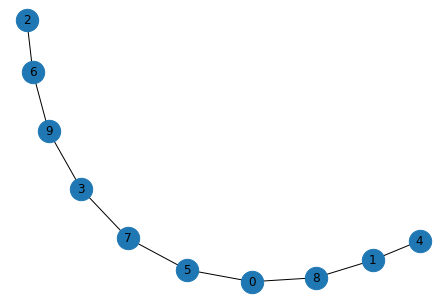

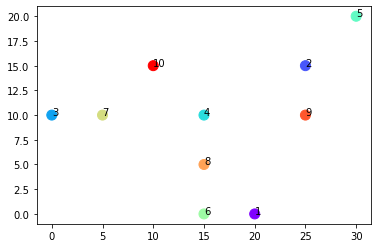

In [71]:
#M = positionToAdjMatrix(x,y,r_det)
M = [[0 for i in range(n)] for j in range(n)]


M[0][5] = 1
M[0][8] = 1
M[8][1] = 1
M[1][4] = 1
M[5][7] = 1
M[7][3] = 1
M[3][9] = 1
M[9][6] = 1
M[6][2] = 1

#affichage
a = np.array(M)
print("matrice d'adjacence :\n",a.reshape(n,n))


#matrice de communication
C = adjToCom(M)
print("\n\n matrice de communication :\n", C.reshape(n,n))

print(C.sum(axis=0))

show_graph_with_labels(a)

colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))


 matrice adjacence 
 [[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


 laplacienne 
 [[ 2.  0.  0.  0.  0. -1.  0.  0. -1.  0.]
 [ 0.  1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  1.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.  1.]]


 matrice de priorité 
 [[0.16865422 0.13772628 0.07953094 0.13451571 0.02038331 0.11028342
  0.02470538 0.1628034  0.08993488 0.07146247]
 [0.04762994 0.13939113 0.08212419 0.10233945 0.00338287 0.11119758
  0.11020021 0.11107128 0.16991009 0.12275325]
 [0.0919399  0.11176576 0.17841094 0.0154019

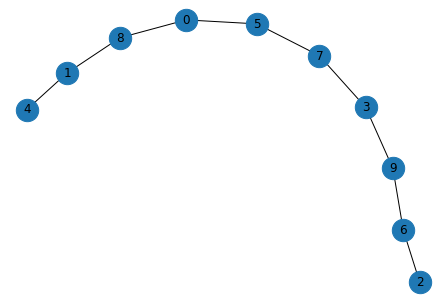

Text(0, 0.5, 'Y axis')

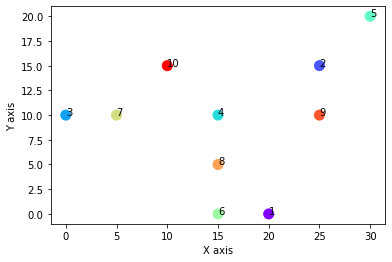

In [72]:

#M = positionToAdjMatrix(x,y,r_det)
H = np.array(M).reshape(n,n)
print("\n matrice adjacence \n", H)

L = Laplacienne(M)
print("\n\n laplacienne \n", L)

P = pMatrix(H)
#print("\n\n P \n",P)

#print("\n\n Ppuissance100 \n",np.linalg.matrix_power(P,100))


W = randStocastic(n)
print("\n\n matrice de priorité \n",W)

S=W
O=W

S = S.sum(axis=0)/n
print("\n\n convergence de W cad Wbar \n",S)


#matrice de communication
A = matriceCom(H,W)
A1 = A
print("\n\n A1 matrice de communication :\n", A1)
print("\n\n A1puissance100 \n",np.linalg.matrix_power(A1,100))

show_graph_with_labels(H)


colors = cm.rainbow(np.linspace(0, 1, n))
plt.scatter(x[0:], y[0:], c=colors, s=100)
    
for i in range(1,n+1):
    plt.annotate(i, (x[i-1], y[i-1]))


plt.xlabel("X axis")

plt.ylabel("Y axis")

In [73]:
valPropre = np.linalg.eigvals(L)
print(np.sort(valPropre, axis=0))

[0. 0. 1. 1. 1. 1. 1. 1. 1. 2.]


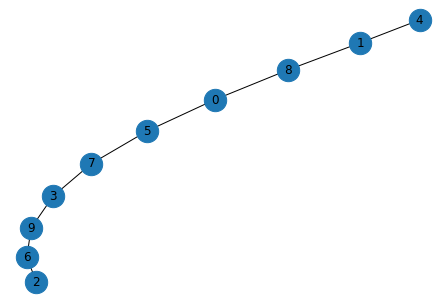

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


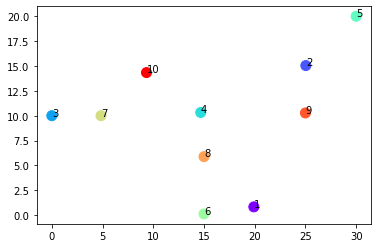

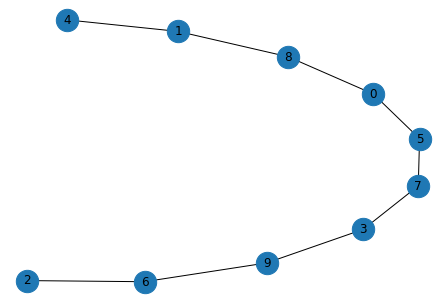

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


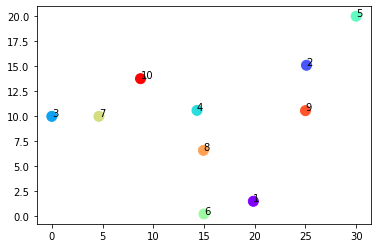

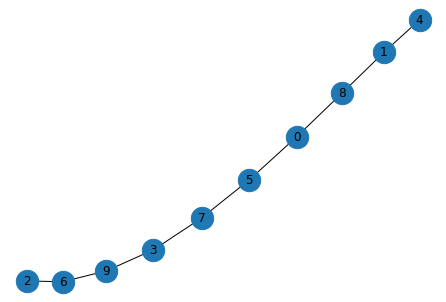

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


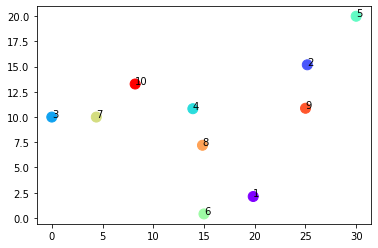

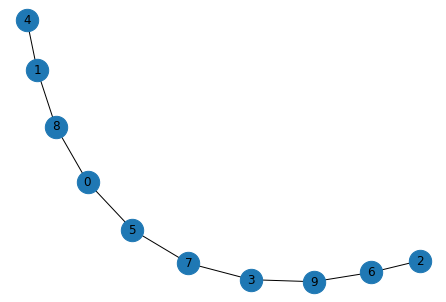

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


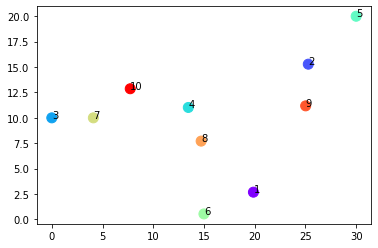

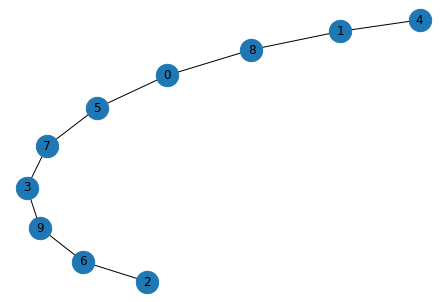

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


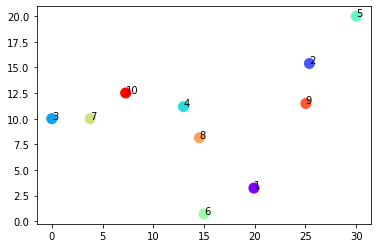

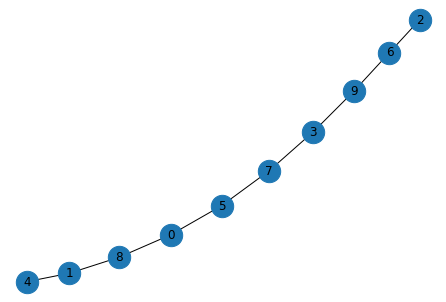

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


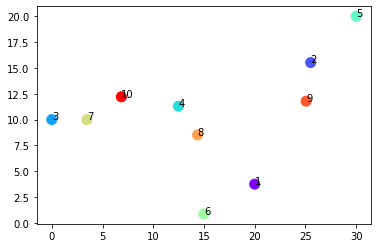

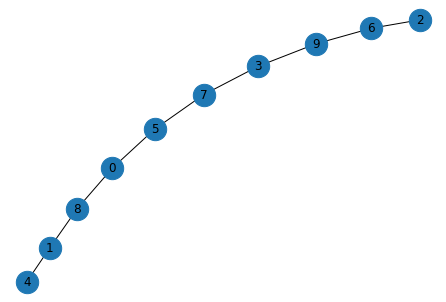

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


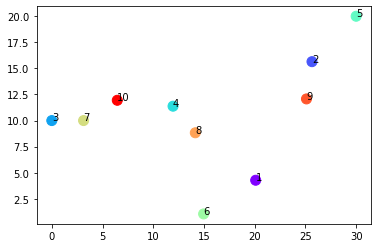

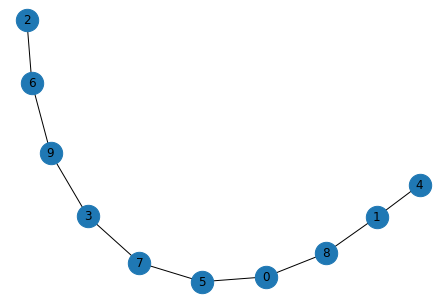

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


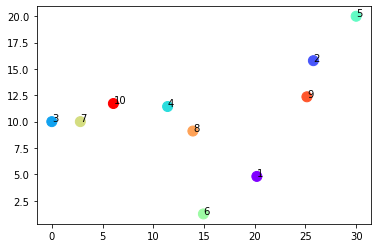

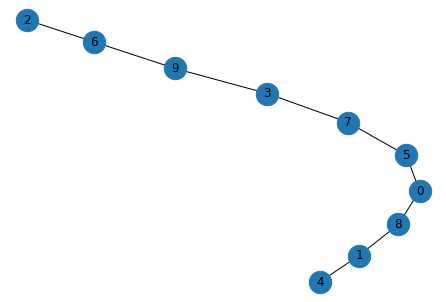

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


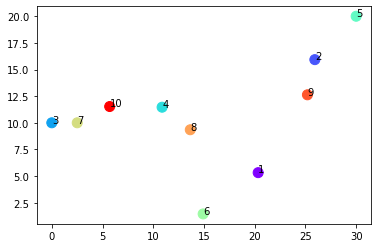

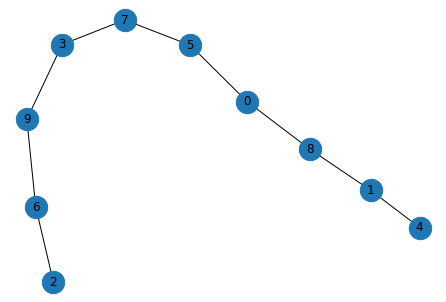

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


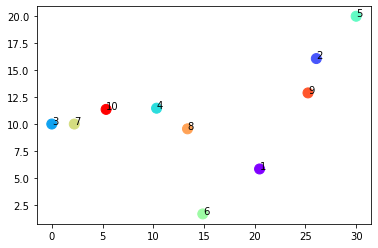

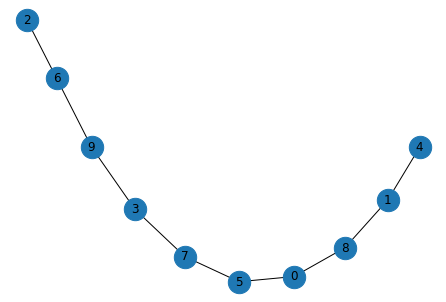

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


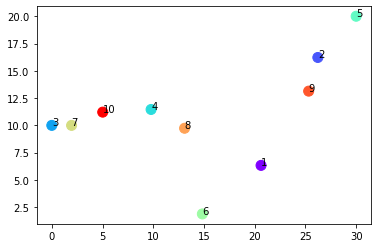

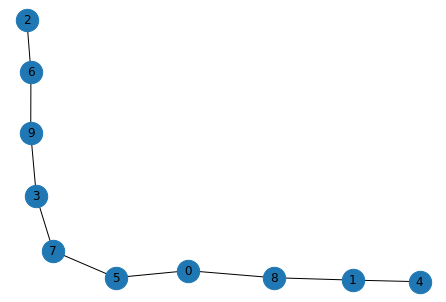

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


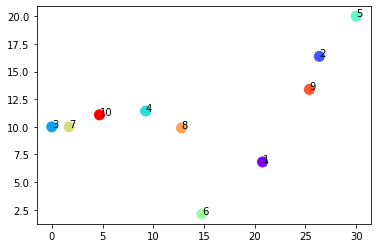

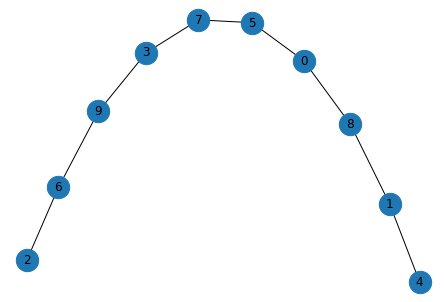

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


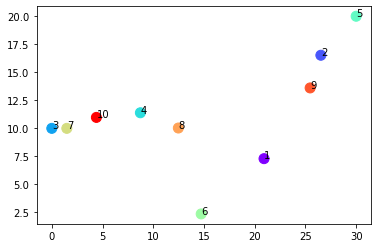

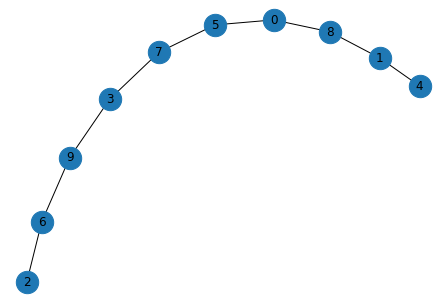

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


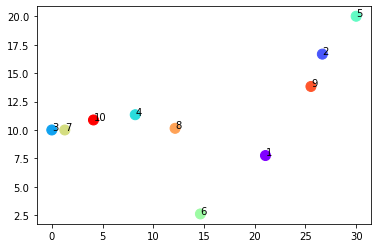

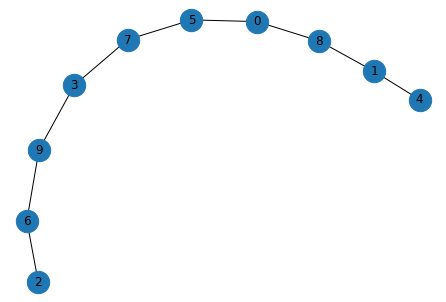

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


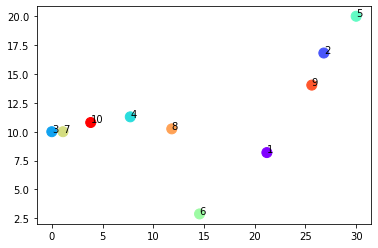

15


 matrice de priorité 
 [[0.11222805 0.10522051 0.13295058 0.12143691 0.06823558 0.07070142
  0.12224106 0.0622453  0.13186439 0.0728762 ]
 [0.0461345  0.0574843  0.16305721 0.05468998 0.04375988 0.10718026
  0.20575471 0.04780463 0.22375245 0.05038209]
 [0.0919399  0.11176576 0.17841094 0.01540195 0.17051771 0.17150771
  0.05380285 0.03297138 0.08066707 0.09301473]
 [0.08975651 0.1124032  0.12673953 0.06380219 0.11459456 0.07199566
  0.12433665 0.05703155 0.12044375 0.11889641]
 [0.04566382 0.03170513 0.18852989 0.03969289 0.05646805 0.10591586
  0.23582932 0.02789222 0.24069867 0.02760415]
 [0.12674108 0.13331266 0.13765735 0.11642618 0.09804922 0.03953328
  0.1300142  0.03438889 0.14307566 0.04080147]
 [0.08706227 0.10732927 0.13915687 0.04902333 0.16022404 0.14474858
  0.06911403 0.03013955 0.09238642 0.12081565]
 [0.0992351  0.12848918 0.13109398 0.08377956 0.08905566 0.05470192
  0.14378516 0.04955391 0.14528359 0.07502195]
 [0.06336549 0.07390873 0.13547958 0.0923302  0.0341

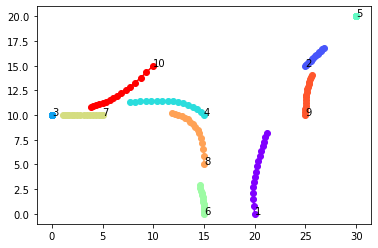

In [74]:
with open("initialCondition.pkl",'wb') as f :
    pickle.dump([x,y],f)

camera = Camera(plt.figure())

#main
X = []
Y = []

#AF AF : Afinal & PiA : produit An An-1 .... A1 
AF = [[0 for i in range(n)] for j in range(n)]
PiA = []

X.extend(x)
Y.extend(y)
for t in range(k):
    
    
    #for i in range(n):
    #    plt.plot(a[:, i], b[:, i], color=colors[i])
        
    #M = positionToAdjMatrix(x,y,r_det)
    H = np.array(M).reshape(n,n)
    
    P = pMatrix(H)
    W = np.dot(P,W)
    A = matriceCom(H,W)
    
    C = adjToCom(M)
    
    x,y = mouvement(x,y,A)
    
    PiA.append(A)
    X.extend(x)
    Y.extend(y)
    a = np.array(X).reshape(t+2,n)
    b = np.array(Y).reshape(t+2,n)
    
    show_graph_with_labels(np.array(M))
    print(H)
    
    plt.scatter(x[0:], y[0:], c=colors, s=100)
    
    for i in range(1,n+1):
        plt.annotate(i, (x[i-1], y[i-1]))
        
    
    
    AF = A
    
    
    plt.pause(1.1)
    camera.snap()
print(len(PiA))

                 
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

print("\n\n matrice de priorité \n",W)
print("\n\n convergence \n",S)



anim = camera.animate(blit=True)


In [75]:
for i in range(len(PiA)):
    print(i,"\n \n matrice A \n \n",PiA[i][1])



0 
 
 matrice A 
 
 [0.         0.99179121 0.         0.         0.00820879 0.
 0.         0.         0.         0.        ]
1 
 
 matrice A 
 
 [0.       0.987404 0.       0.       0.012596 0.       0.       0.
 0.       0.      ]
2 
 
 matrice A 
 
 [0.         0.98341563 0.         0.         0.01658437 0.
 0.         0.         0.         0.        ]
3 
 
 matrice A 
 
 [0.         0.97978984 0.         0.         0.02021016 0.
 0.         0.         0.         0.        ]
4 
 
 matrice A 
 
 [0.         0.97649367 0.         0.         0.02350633 0.
 0.         0.         0.         0.        ]
5 
 
 matrice A 
 
 [0.         0.97349715 0.         0.         0.02650285 0.
 0.         0.         0.         0.        ]
6 
 
 matrice A 
 
 [0.         0.97077304 0.         0.         0.02922696 0.
 0.         0.         0.         0.        ]
7 
 
 matrice A 
 
 [0.         0.96829658 0.         0.         0.03170342 0.
 0.         0.         0.         0.        ]
8 
 
 matrice A 
 

Text(0, 0.5, 'Y axis')

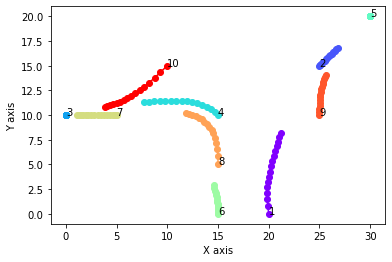

In [76]:
for i in range(n):
    plt.plot(a[:, i], b[:, i],"o-" ,color=colors[i])
    
for i in range(1,n+1):
    plt.annotate(i, (a[0][i-1], b[0][i-1]))

plt.xlabel("X axis")

plt.ylabel("Y axis")

In [77]:
print(A1)

[[0.7997817  0.         0.         0.         0.         0.11028342
  0.         0.         0.08993488 0.        ]
 [0.         0.99661713 0.         0.         0.00338287 0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.94018764 0.         0.
  0.         0.         0.         0.05981236]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.97400054
  0.         0.02599946 0.         0.        ]
 [0.         0.         0.01443694 0.         0.         0.
  0.98556306 0.         0.         0.        ]
 [0.         0.         0.         0.19117568 0.         0.
  0.         0.80882432 0.         0.        ]
 [0.         0.04647104 0.         0.         0.         0.
  0.         0.         0.95352896 0.        ]
 [0.         0.      

In [78]:
print(AF)

[[0.7974342  0.         0.         0.         0.         0.07070142
  0.         0.         0.13186439 0.        ]
 [0.         0.95624012 0.         0.         0.04375988 0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.88110359 0.         0.
  0.         0.         0.         0.11889641]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.96561111
  0.         0.03438889 0.         0.        ]
 [0.         0.         0.13915687 0.         0.         0.
  0.86084313 0.         0.         0.        ]
 [0.         0.         0.         0.08377956 0.         0.
  0.         0.91622044 0.         0.        ]
 [0.         0.07390873 0.         0.         0.         0.
  0.         0.         0.92609127 0.        ]
 [0.         0.      

In [79]:
print(len(PiA),np.array(PiA[len(PiA)-1]))

15 [[0.7974342  0.         0.         0.         0.         0.07070142
  0.         0.         0.13186439 0.        ]
 [0.         0.95624012 0.         0.         0.04375988 0.
  0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.88110359 0.         0.
  0.         0.         0.         0.11889641]
 [0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.96561111
  0.         0.03438889 0.         0.        ]
 [0.         0.         0.13915687 0.         0.         0.
  0.86084313 0.         0.         0.        ]
 [0.         0.         0.         0.08377956 0.         0.
  0.         0.91622044 0.         0.        ]
 [0.         0.07390873 0.         0.         0.         0.
  0.         0.         0.92609127 0.        ]
 [0.         0.   

In [80]:
def prod1_n(PiA):
    produit = np.identity(n)
    for i in PiA:
        produit = np.dot(produit,np.array(i))
    return produit

def prodn_1(PiA):
    produit = np.identity(n)
    for i in PiA:
        produit = np.dot(np.array(i),produit)
        #print(i,"\n \n matrice A \n \n",produit)
    return produit

def prod2n_1(PiA):
    produit = np.identity(n)
    for i in PiA[:10:-1]:
        produit = np.dot(produit,np.array(i))
    return produit



In [81]:
A1_n = prod1_n(PiA)
An_1 = prodn_1(PiA)

A2n_1 = prod2n_1(PiA)

In [82]:
print(A1_n)

[[5.39148295e-02 2.00542344e-01 7.41761253e-04 2.67455619e-02
  4.76370592e-02 3.43366513e-01 2.39425991e-03 7.46073437e-02
  2.39536440e-01 1.05138880e-02]
 [0.00000000e+00 6.37071012e-01 0.00000000e+00 0.00000000e+00
  3.62928988e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.97473751e-01 2.23009178e-01
  0.00000000e+00 0.00000000e+00 2.25606023e-01 0.00000000e+00
  0.00000000e+00 3.53911048e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.30494647e-03 8.62670662e-02
  0.00000000e+00 6.70115016e-01 1.30157352e-02 1.80704611e-01
  0.00000000e+00 4.45926259e-02]
 [0.00000000e+00 0.00000000e+00 7.79522582e-01 0.00000000e

In [83]:
print(An_1)

[[5.39148295e-02 2.72222220e-01 2.62680543e-04 3.23943725e-02
  3.92796762e-02 2.86720755e-01 2.58759333e-03 3.78438443e-02
  2.68139556e-01 6.63447327e-03]
 [0.00000000e+00 6.37071012e-01 0.00000000e+00 0.00000000e+00
  3.62928988e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.56335254e-01 2.23009178e-01
  0.00000000e+00 0.00000000e+00 3.63151969e-01 0.00000000e+00
  0.00000000e+00 2.57503599e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.81302574e-03 1.45310027e-01
  0.00000000e+00 6.70115016e-01 1.98130660e-02 1.22975768e-01
  0.00000000e+00 3.89730983e-02]
 [0.00000000e+00 0.00000000e+00 7.79522582e-01 0.00000000e

In [84]:
print(a)

[[20.         25.          0.         15.         30.         15.
   5.         15.         25.         10.        ]
 [19.91439824 25.04104397  0.         14.67997387 30.         15.
   4.85328165 15.         25.          9.33384068]
 [19.86645182 25.10350698  0.         14.31285536 30.         15.
   4.64509897 14.94799579 25.00253273  8.74555725]
 [19.85361528 25.18471222  0.         13.90310927 30.         14.99884513
   4.38862054 14.85246812 25.00930515  8.21636329]
 [19.8733605  25.28202994  0.         13.45598434 30.         14.99562359
   4.09715253 14.71985301 25.02179604  7.73183069]
 [19.92273331 25.3929321   0.         12.97732836 30.         14.98949676
   3.78332709 14.55522758 25.04113294  7.28135144]
 [19.99825073 25.51503252  0.         12.47334075 30.         14.97961087
   3.45852131 14.36272971 25.06804968  6.85748358]
 [20.09598454 25.64611447  0.         11.95032454 30.         14.9650602
   3.13249913 14.14581909 25.1028984   6.45528103]
 [20.21173555 25.78414754

In [85]:
a1=[20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
b1=[ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]

a2=[20., 25.,  0., 15., 30., 15.,  5., 15., 25., 10.]
b2=[ 0., 15., 10.,  10.,  20.,  0., 10.,  5., 10., 15.]

In [86]:
print(sum(a1)/n,sum(b1)/n)

16.0 9.5


In [87]:
Xpre = (a[0]*S).sum(axis=0)
Ypre = (b[0]*S).sum(axis=0)

print("Prédiction de l'abscice final\n",Xpre)
print("\n Abscisse final de chaque agent :  \n",a[k])
print("\nPrédiction de l'ordonné final\n",Ypre)
print("\n Ordonné final de chaque agent :  \n",b[k])

Prédiction de l'abscice final
 15.639824292595458

 Abscisse final de chaque agent :  
 [21.19939854 26.81464494  0.          7.73593351 30.         14.56480846
  1.10238709 11.8239424  25.62642623  3.83646136]

Prédiction de l'ordonné final
 9.632561039623782

 Ordonné final de chaque agent :  
 [ 8.19150516 16.81464494 10.         11.287518   20.          2.8788365
 10.         10.24654667 14.03558302 10.79591829]




[21.19939854 26.81464494  0.          7.73593351 30.         14.56480846
  1.10238709 11.8239424  25.62642623  3.83646136] [ 8.19150516 16.81464494 10.         11.287518   20.          2.8788365
 10.         10.24654667 14.03558302 10.79591829]


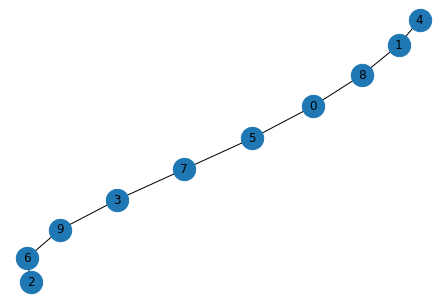

[[0 0 0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


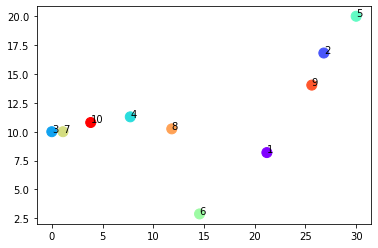

In [88]:

xf1,yf1 = mouvement(a1,b1,An_1)


#print(xf1.sum(axis=0)/n, yf1.sum(axis=0)/n)
print("\n")
print(xf1,yf1)

#M = positionToAdjMatrix(xf1,yf1,r_det)
H = np.array(M).reshape(n,n)

show_graph_with_labels(np.array(M))
print(H)
    
plt.scatter(xf1[0:], yf1[0:], c=colors, s=100)

for i in range(1,n+1):
    plt.annotate(i, (xf1[i-1], yf1[i-1]))

In [89]:
print(a1)

[20.0, 25.0, 0.0, 15.0, 30.0, 15.0, 5.0, 15.0, 25.0, 10.0]


In [90]:
Xpre2 = (a[0]*An_1[0]).sum(axis=0)
Ypre2 = (b[0]*An_1[0]).sum(axis=0)

print("Prédiction de l'abscice final\n",Xpre2)
print("\n Abscisse final de chaque agent :  \n",a[k])
print("\nPrédiction de l'ordonné final\n",Ypre2)
print("\n Ordonné final de chaque agent :  \n",b[k])

Prédiction de l'abscice final
 21.19939853965941

 Abscisse final de chaque agent :  
 [21.19939854 26.81464494  0.          7.73593351 30.         14.56480846
  1.10238709 11.8239424  25.62642623  3.83646136]

Prédiction de l'ordonné final
 8.191505163032474

 Ordonné final de chaque agent :  
 [ 8.19150516 16.81464494 10.         11.287518   20.          2.8788365
 10.         10.24654667 14.03558302 10.79591829]


In [91]:
xf,yf = mouvement(a2,b2,An_1)


print("\n")
print(xf,yf)



[21.19939854 26.81464494  0.          7.73593351 30.         14.56480846
  1.10238709 11.8239424  25.62642623  3.83646136] [ 8.19150516 16.81464494 10.         11.287518   20.          2.8788365
 10.         10.24654667 14.03558302 10.79591829]


In [92]:
print(sum(xf)/n)

14.270400253504596


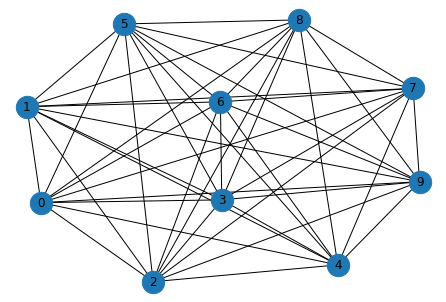

[[0 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1]
 [1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 0 1 1 1 1 1]
 [1 1 1 1 1 0 1 1 1 1]
 [1 1 1 1 1 1 0 1 1 1]
 [1 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 0]]


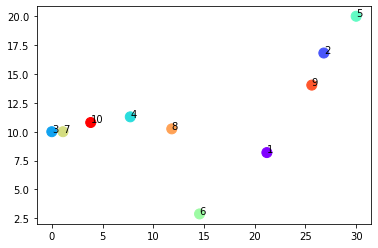

In [93]:
M = positionToAdjMatrix(xf,yf,r_det)
H = np.array(M).reshape(n,n)

show_graph_with_labels(np.array(M))
print(H)
    
plt.scatter(xf[0:], yf[0:], c=colors, s=100)

for i in range(1,n+1):
    plt.annotate(i, (xf[i-1], yf[i-1]))


In [94]:
print(A1_n[0])

[0.05391483 0.20054234 0.00074176 0.02674556 0.04763706 0.34336651
 0.00239426 0.07460734 0.23953644 0.01051389]
